## IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW OF DATA

In [2]:
train = pd.read_csv("C:/Users/kishorkrishna/Desktop/GREAT LEARNING/INTERNSHALA/Terra BLUE XT/train_csv.csv")

In [3]:
train.head(10)

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70
5,5,2019-03-19 00:00:50,302.08
6,6,2019-03-19 00:01:00,152.25
7,7,2019-03-19 00:01:10,41.19
8,8,2019-03-19 00:01:20,34.61
9,9,2019-03-19 00:01:30,205.87


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
id         80 non-null int64
time       80 non-null object
feature    80 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [5]:
train.describe()

,id,feature
count,80.0000,80.000000
mean,39.5000,147.496375
std,23.2379,96.846260
min,0.0000,21.360000
25%,19.7500,66.730000
50%,39.5000,125.240000
75%,59.2500,199.820000
max,79.0000,469.720000


In [6]:
train['time'] = pd.to_datetime(train['time'])


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
id         80 non-null int64
time       80 non-null datetime64[ns]
feature    80 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.0 KB


## EDA

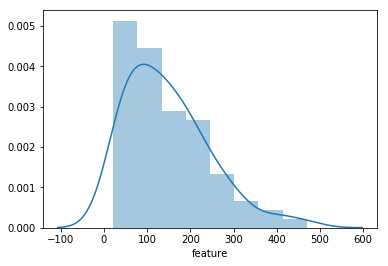

In [8]:
sns.distplot(train['feature'])

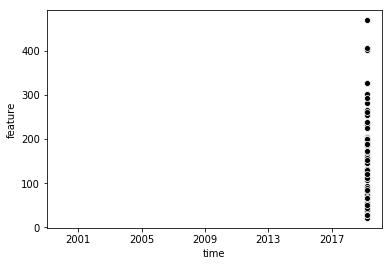

In [9]:
sns.scatterplot(x = train['time'], y = train['feature'], color = 'black')
plt.show()

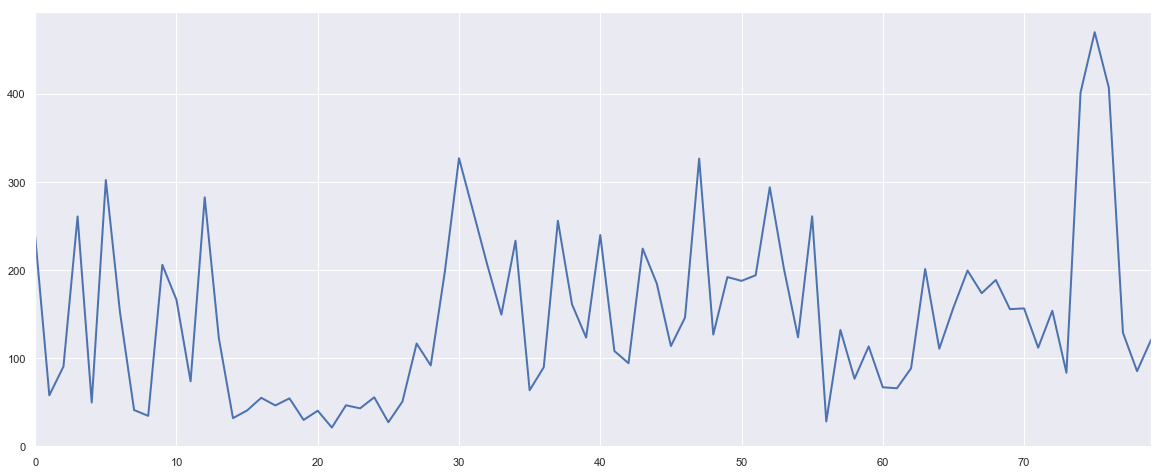

In [10]:
sns.set(rc={'figure.figsize':(20, 8)})
train['feature'].plot(linewidth=2)

In [11]:
indexeddataset = train.set_index(['time'])

In [12]:
indexeddataset = indexeddataset.drop(['id'], axis = 1)

In [13]:
indexeddataset.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


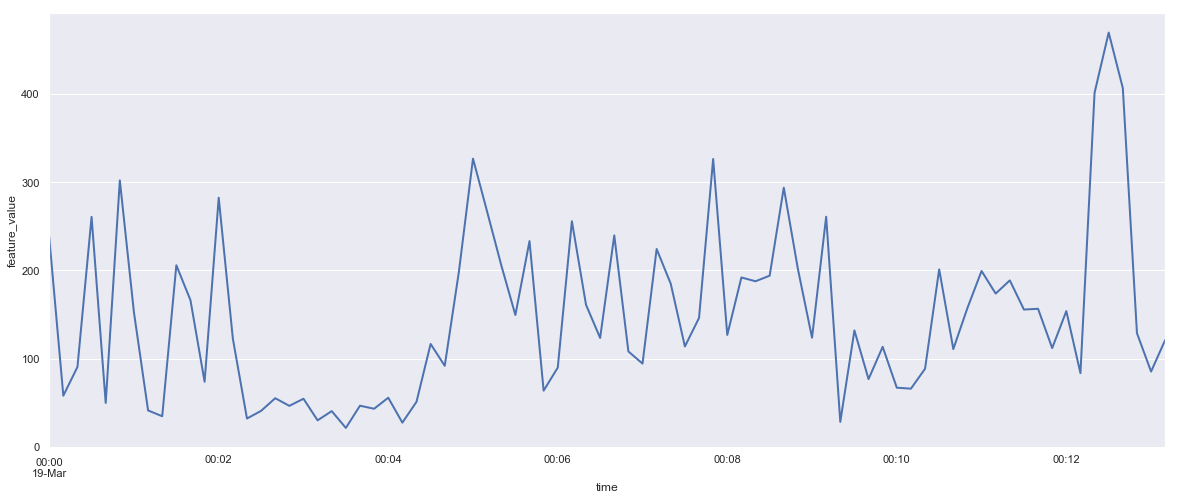

In [14]:
plt.xlabel("time")
plt.ylabel("feature_value")
indexeddataset['feature'].plot(linewidth=2)

## Moving average 

In [15]:
#rolling statistics
rolmean = indexeddataset.rolling(window = 10).mean()

rolstd = indexeddataset.rolling(window = 10).std()
print(rolmean,rolstd)


                     feature
time                        
2019-03-19 00:00:00      NaN
2019-03-19 00:00:10      NaN
2019-03-19 00:00:20      NaN
2019-03-19 00:00:30      NaN
2019-03-19 00:00:40      NaN
2019-03-19 00:00:50      NaN
2019-03-19 00:01:00      NaN
2019-03-19 00:01:10      NaN
2019-03-19 00:01:20      NaN
2019-03-19 00:01:30  143.288
2019-03-19 00:01:40  136.114
2019-03-19 00:01:50  137.696
2019-03-19 00:02:00  156.889
2019-03-19 00:02:10  143.085
2019-03-19 00:02:20  141.319
2019-03-19 00:02:30  115.184
2019-03-19 00:02:40  105.465
2019-03-19 00:02:50  105.986
2019-03-19 00:03:00  107.971
2019-03-19 00:03:10   90.381
2019-03-19 00:03:20   77.801
2019-03-19 00:03:30   72.562
2019-03-19 00:03:40   48.975
2019-03-19 00:03:50   41.015
2019-03-19 00:04:00   43.373
2019-03-19 00:04:10   42.036
2019-03-19 00:04:20   41.624
2019-03-19 00:04:30   48.645
2019-03-19 00:04:40   52.379
2019-03-19 00:04:50   69.214
...                      ...
2019-03-19 00:08:20  170.414
2019-03-19 00:

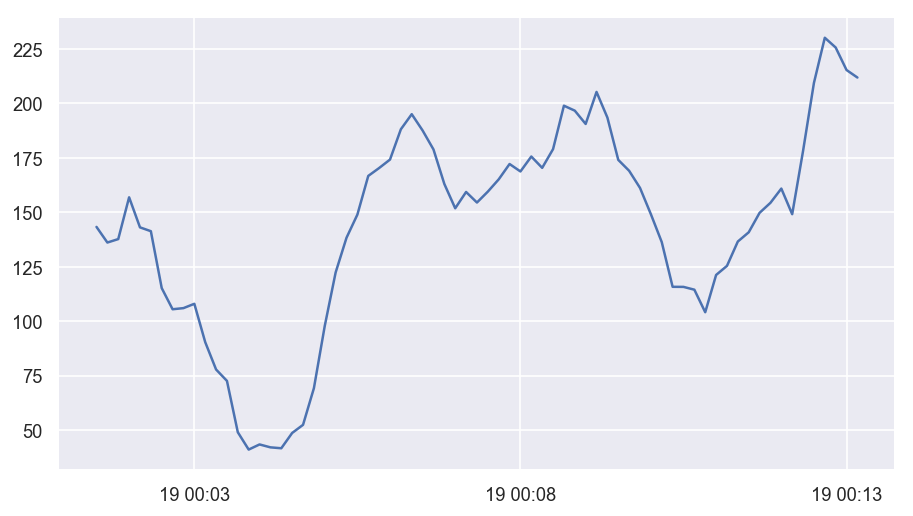

In [38]:
plt.plot(rolmean)

In [16]:
indexeddataset[1:6].mean()

feature    152.198
dtype: float64

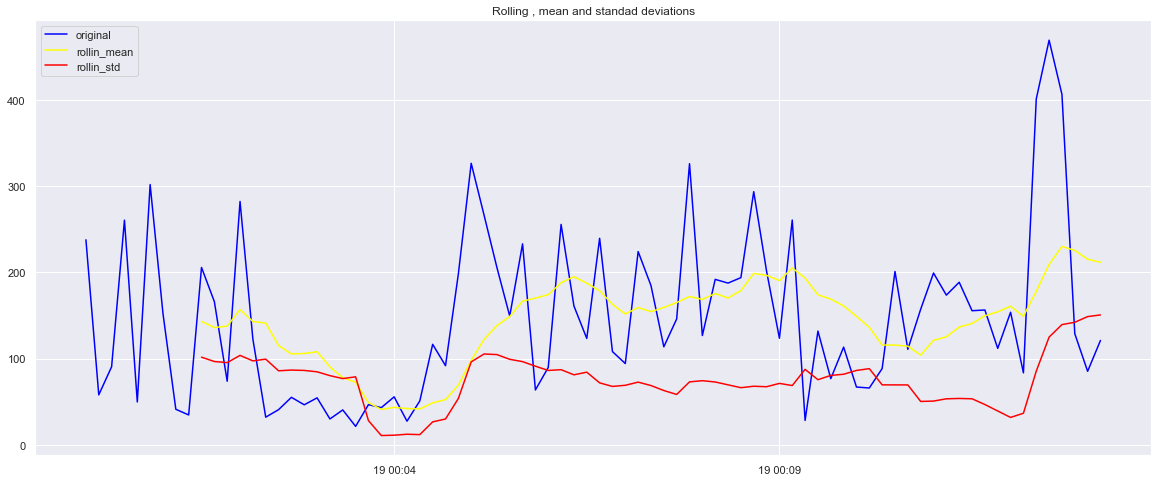

In [17]:
#plotting rolling statistics
sns.set(rc={'figure.figsize':(20, 8)})
orig = plt.plot(indexeddataset, color = 'blue', label = 'original')
mean = plt.plot(rolmean, color = 'yellow', label = 'rollin_mean')
std = plt.plot(rolstd, color = 'red', label = 'rollin_std')
plt.legend(loc = "best")
plt.title("Rolling , mean and standad deviations")
plt.show(block = False)

## check for stationary

In [18]:
# check whether the time series is stationary
# perform dickey fuller test
from statsmodels.tsa.stattools import adfuller

print(" Results of dickey-fuller test")
dftest = adfuller(indexeddataset['feature'],autolag= "AIC")

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','P - Value','lags used','NO of observations used'])
for key,value in dftest[4].items():
    dfoutput["critical value (%s)"%key] = value

print(dfoutput)

# from the results we know that the time series is stationary

 Results of dickey-fuller test
Test Statistic            -5.945866e+00
P - Value                  2.205049e-07
lags used                  0.000000e+00
NO of observations used    7.900000e+01
critical value (1%)       -3.515977e+00
critical value (5%)       -2.898886e+00
critical value (10%)      -2.586694e+00
dtype: float64


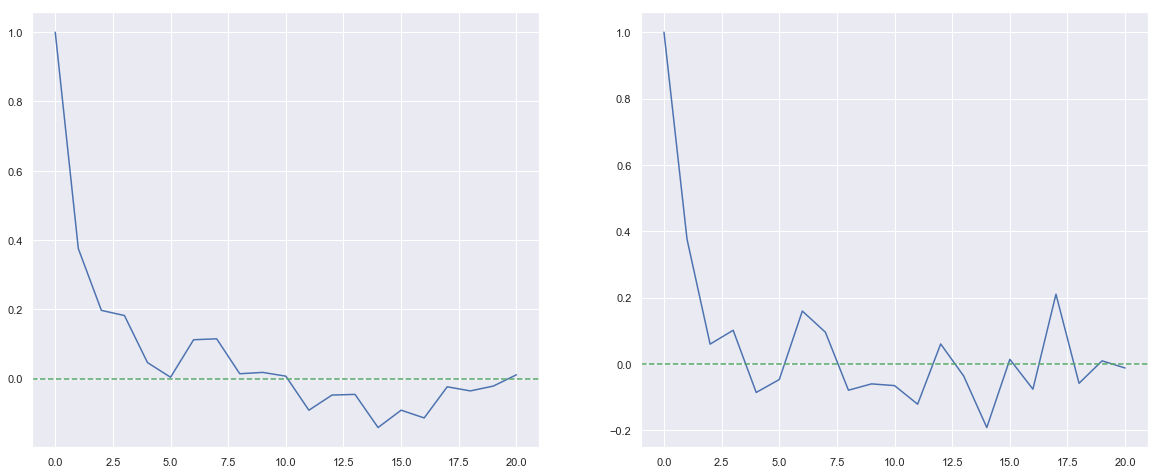

In [19]:
# auto-correlation and correlation plot
from statsmodels.tsa.stattools import acf, pacf

tr_acf = acf(indexeddataset, nlags = 20)
tr_pacf = pacf(indexeddataset, nlags = 20, method = 'ols')


plt.subplot(121)
plt.plot(tr_acf)
plt.axhline(y = 0,linestyle = '--', color = 'g')
#p- value is 5

plt.subplot(122)
plt.plot(tr_pacf)
plt.axhline(y = 0,linestyle = '--', color = 'g')
#q value is 4

In [20]:
indexeddataset.dropna(inplace=True)

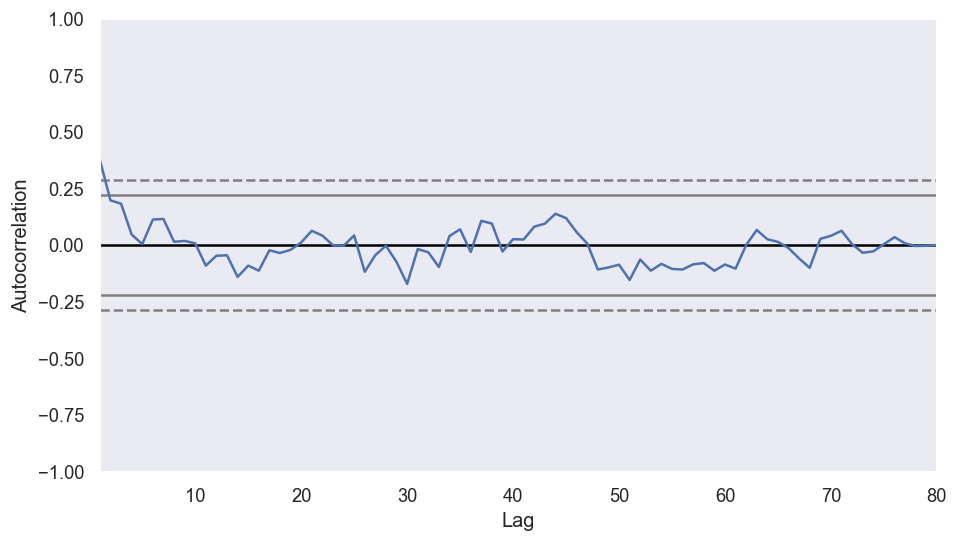

In [21]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(indexeddataset.feature.tolist())

In [22]:
indexeddataset = indexeddataset.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [23]:
indexeddataset.shape

(80, 1)

## test for seasonality of time series

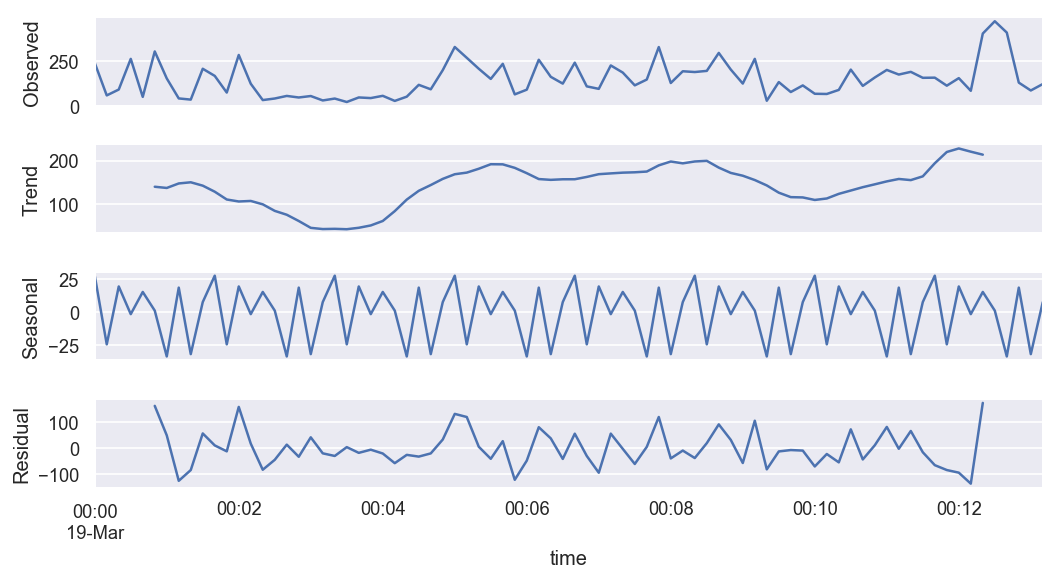

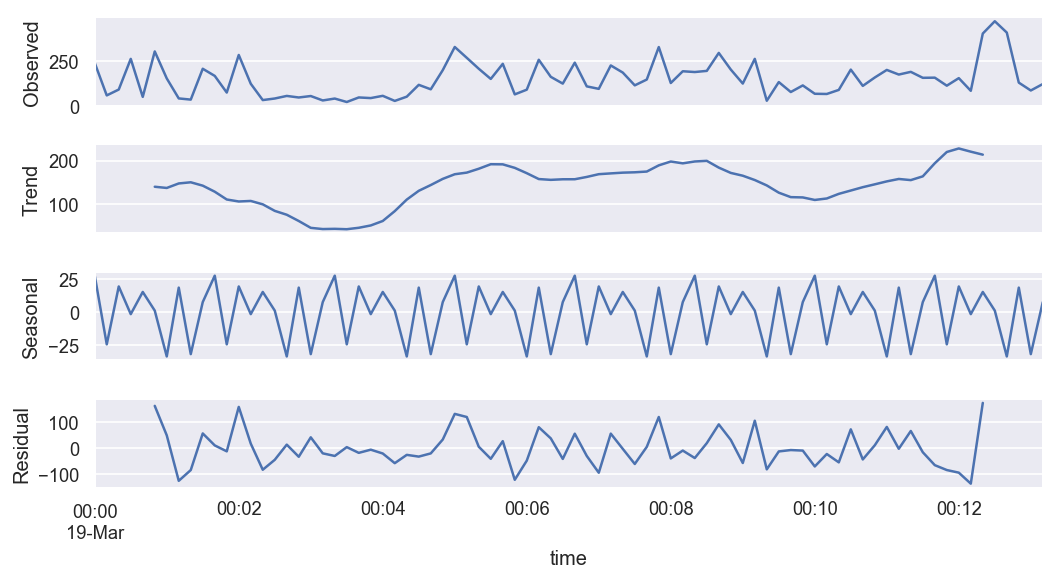

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(indexeddataset['feature'], model ='additive', freq= 10)
result.plot()


## FEATURE ENGINEERING

## MODELLING

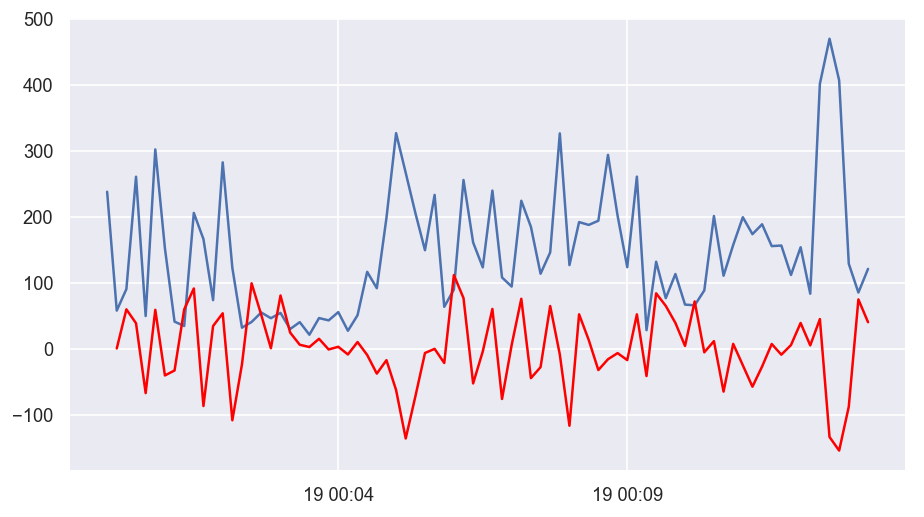

In [25]:
# ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# ar model
model = ARIMA(indexeddataset,order = (5,1,0))
results_AR = model.fit(disp = 0)
plt.plot(indexeddataset)
plt.plot(results_AR.fittedvalues,color = 'red')

In [26]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.feature   No. Observations:                   79
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -468.793
Method:                       css-mle   S.D. of innovations             90.791
Date:                Fri, 19 Jun 2020   AIC                            951.587
Time:                        14:08:01   BIC                            968.173
Sample:                    03-19-2019   HQIC                           958.232
                         - 03-19-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5937      3.542      0.168      0.867      -6.349       7.536
ar.L1.D.feature    -0.5285      0.108     -4.878      0.000      -0.741      -0.316
ar.L2.D.feature    -0.4511      

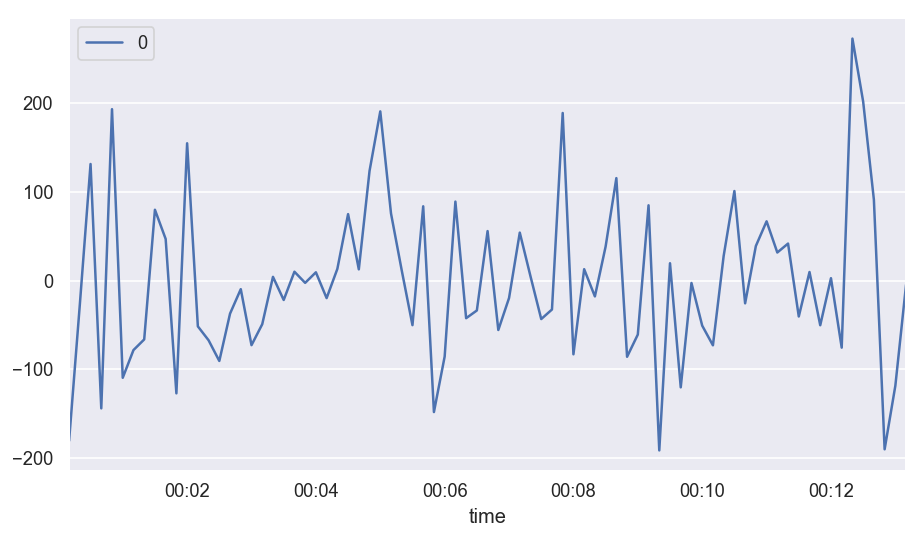

In [28]:
f = pd.DataFrame(results_AR.resid)
f.plot()

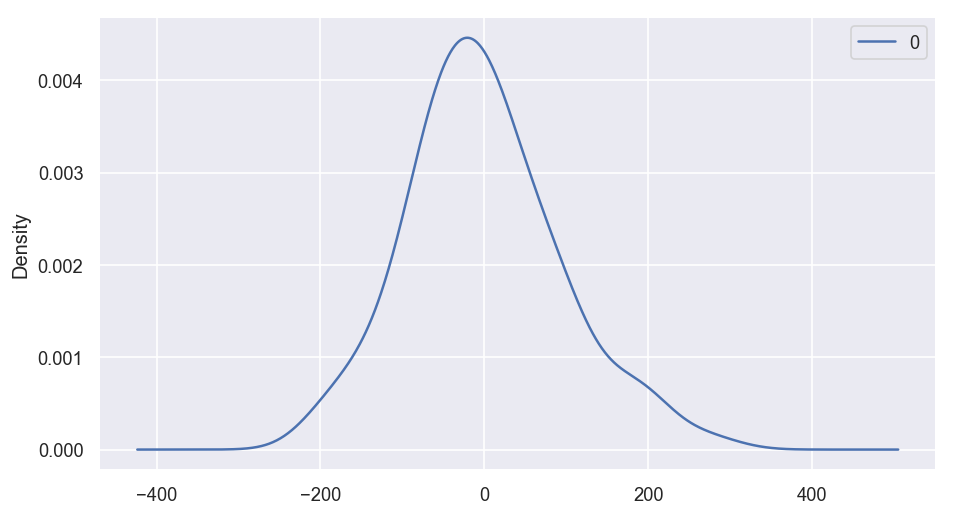

                0
count   79.000000
mean    -1.116822
std     92.742524
min   -191.387178
25%    -58.204426
50%     -4.514598
75%     50.571106
max    272.876635


In [29]:
f.plot(kind='kde')
plt.show()
print(f.describe())

In [30]:
np.exp(1)

2.7182818284590451

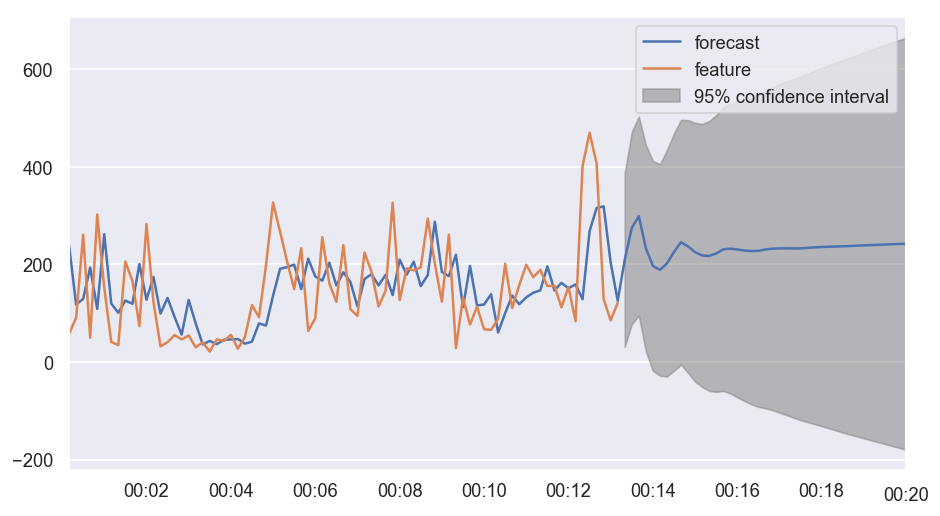

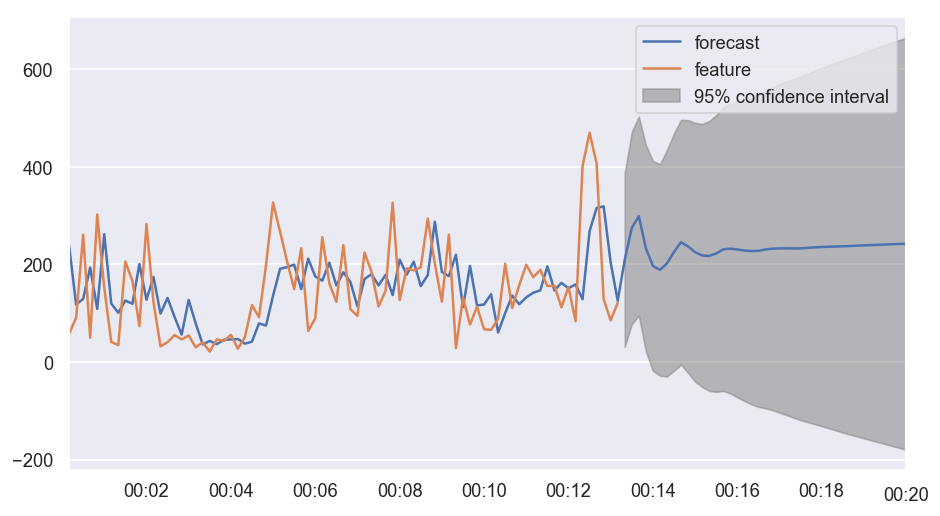

In [31]:
results_AR.plot_predict(1,120)

In [32]:
predicted_vals = results_AR.forecast(steps = 40)

In [33]:
predicted_vals

(array([ 209.35253913,  274.5493101 ,  298.83905263,  233.34035422,
         197.0334079 ,  188.63665719,  202.00441825,  225.28380831,
         245.40214692,  236.80253008,  225.09783835,  218.38915847,
         217.24087415,  222.37217779,  230.80869694,  232.31183948,
         230.48534009,  228.55984444,  227.18333201,  227.77549653,
         230.54461277,  232.25797909,  232.77620822,  232.88053407,
         232.69874505,  232.84509805,  233.82693231,  234.84933933,
         235.60297794,  236.20430557,  236.60963956,  236.97706013,
         237.57569522,  238.27213518,  238.94034388,  239.58463092,
         240.16023403,  240.68171899,  241.24660467,  241.85213312]),
 array([  90.79124454,  100.376245  ,  104.0003584 ,  107.7807879 ,
         109.65769389,  110.54964506,  118.22795936,  124.01367673,
         127.94479251,  132.02161991,  135.17614901,  137.35078124,
         140.92447428,  144.65190988,  147.95380102,  151.34368351,
         154.4900726 ,  157.15459126,  160.039

In [34]:
forecast, stderr, conf = results_AR.forecast()
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Standard Error: 90.791
95% Prediction Interval: 31.405 to 387.300


### GRID SEARCH

In [35]:
def arima_model(data,p,d,q):
    
    model = ARIMA(data,order = (p,d,q))
    try:
        val = []
        results_AR = model.fit(disp = 0)
        forecast, stderr, conf = results_AR.forecast()
        print('Standard Error: %.3f' % stderr)
        print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

        return stderr
    except:
        pass

In [36]:
p_values = [0, 1, 2,3,4,5,6,7,8,9,10]
d_values = range(0, 3)
q_values = range(0, 3)

list_stderr = []

best_para = []

for i in p_values:
    for j in d_values:
        for k in q_values:
            u = arima_model(indexeddataset,i,j,k)
            
            if(u):
                list_stderr.append(u)
            
                if(u <= min(list_stderr)):
                    best_para.clear()
                    best_para.append(u)
                    best_para.append(i)
                    best_para.append(j)
                    best_para.append(k)

print("the best parameters are ", best_para)



Standard Error: 96.239
95% Prediction Interval: -41.129 to 336.121
Standard Error: 90.121
95% Prediction Interval: -33.764 to 319.504
Standard Error: 89.701
95% Prediction Interval: -32.838 to 318.783
Standard Error: 107.708
95% Prediction Interval: -91.463 to 330.745
Standard Error: 93.976
95% Prediction Interval: 7.993 to 376.373
Standard Error: 88.705
95% Prediction Interval: 3.424 to 351.139
Standard Error: 176.490
95% Prediction Interval: -186.186 to 505.641
Standard Error: 108.391
95% Prediction Interval: -90.749 to 334.134
Standard Error: 89.111
95% Prediction Interval: -36.760 to 312.547
Standard Error: 88.840
95% Prediction Interval: -39.112 to 309.133
Standard Error: 100.879
95% Prediction Interval: -90.596 to 304.842
Standard Error: 88.304
95% Prediction Interval: -6.050 to 340.094
Standard Error: 88.280
95% Prediction Interval: -11.033 to 335.018
Standard Error: 144.364
95% Prediction Interval: -169.370 to 396.524
Standard Error: 101.532
95% Prediction Interval: -91.361 to 

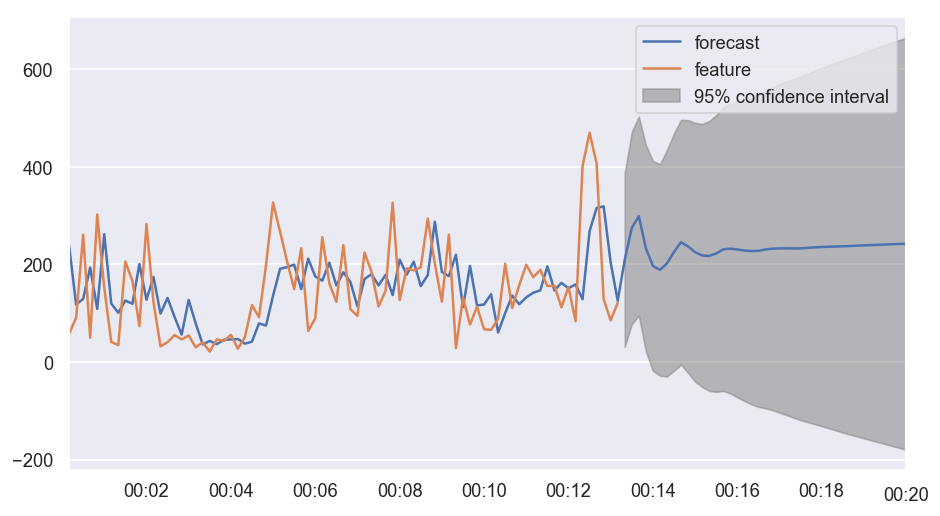

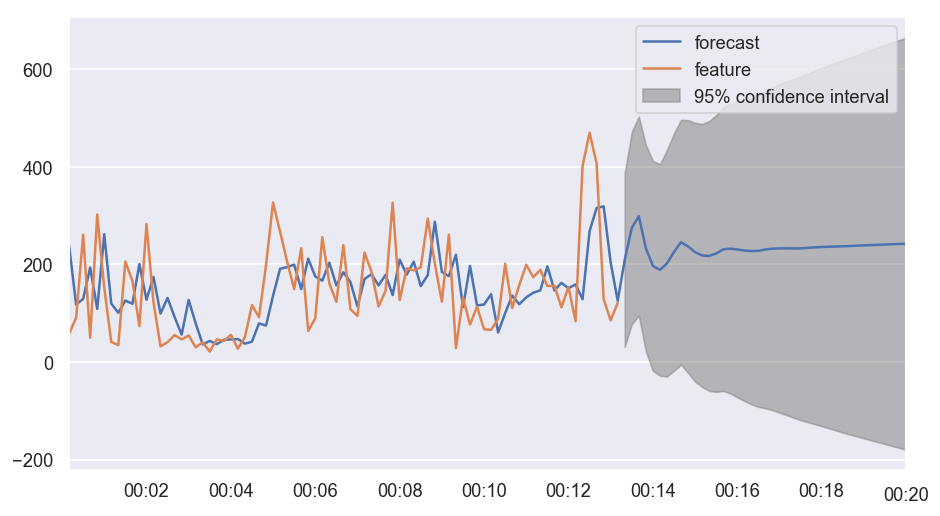

In [37]:
#modelling the data with best parameters
best_model = ARIMA(indexeddataset,order = (best_para[1],best_para[2],best_para[3]))
best_results_AR = model.fit(disp = 0)
best_results_AR.plot_predict(1,120)

In [47]:
best_results_AR_pred = best_results_AR.forecast(40)

In [51]:
best_results_AR_pred

(array([ 209.35253913,  274.5493101 ,  298.83905263,  233.34035422,
         197.0334079 ,  188.63665719,  202.00441825,  225.28380831,
         245.40214692,  236.80253008,  225.09783835,  218.38915847,
         217.24087415,  222.37217779,  230.80869694,  232.31183948,
         230.48534009,  228.55984444,  227.18333201,  227.77549653,
         230.54461277,  232.25797909,  232.77620822,  232.88053407,
         232.69874505,  232.84509805,  233.82693231,  234.84933933,
         235.60297794,  236.20430557,  236.60963956,  236.97706013,
         237.57569522,  238.27213518,  238.94034388,  239.58463092,
         240.16023403,  240.68171899,  241.24660467,  241.85213312]),
 array([  90.79124454,  100.376245  ,  104.0003584 ,  107.7807879 ,
         109.65769389,  110.54964506,  118.22795936,  124.01367673,
         127.94479251,  132.02161991,  135.17614901,  137.35078124,
         140.92447428,  144.65190988,  147.95380102,  151.34368351,
         154.4900726 ,  157.15459126,  160.039